In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Iteration    0: Cost 1.21e+11  dj_dw: -2.963e+04, dj_db: -3.798e+01   w:  2.963e+02, b: 3.79802e-01
Iteration    1: Cost 9.26e+19  dj_dw:  8.188e+08, dj_db:  3.211e+05   w: -8.188e+06, b:-3.21039e+03
Iteration    2: Cost 7.08e+28  dj_dw: -2.263e+13, dj_db: -8.875e+09   w:  2.263e+11, b: 8.87428e+07
Iteration    3: Cost 5.41e+37  dj_dw:  6.254e+17, dj_db:  2.453e+14   w: -6.254e+15, b:-2.45266e+12
Iteration    4: Cost 4.13e+46  dj_dw: -1.729e+22, dj_db: -6.779e+18   w:  1.729e+20, b: 6.77861e+16
Iteration    5: Cost 3.15e+55  dj_dw:  4.777e+26, dj_db:  1.874e+23   w: -4.777e+24, b:-1.87346e+21
Iteration    6: Cost 2.41e+64  dj_dw: -1.320e+31, dj_db: -5.178e+27   w:  1.320e+29, b: 5.17783e+25
Iteration    7: Cost 1.84e+73  dj_dw:  3.649e+35, dj_db:  1.431e+32   w: -3.649e+33, b:-1.43104e+30
Iteration    8: Cost 1.41e+82  dj_dw: -1.009e+40, dj_db: -3.955e+36   w:  1.009e+38, b: 3.95508e+34
Iteration    9: Cost 1.07e+91  dj_dw:  2.787e+44, dj_db:  1.093e+41   w: -2.787e+42, b:-1.09310e+39


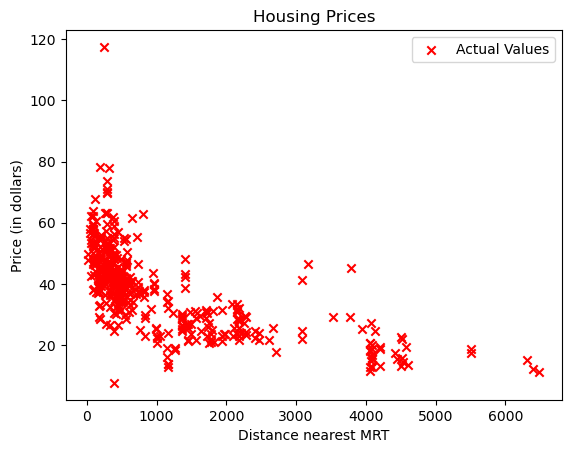

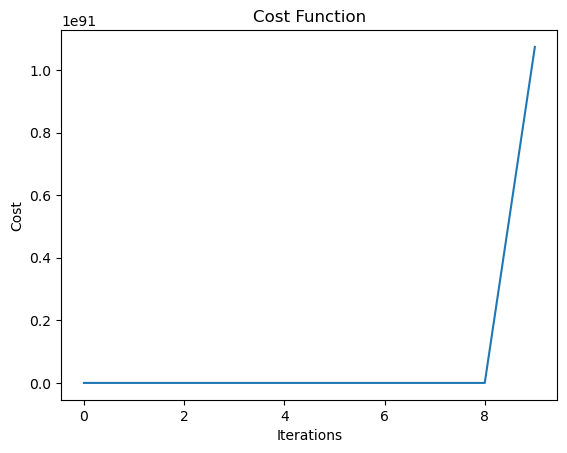

Text(0.5, 1.0, 'Linear Regression')

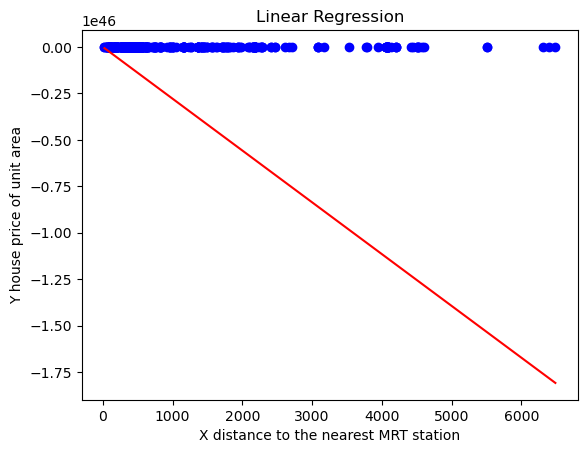

In [6]:
# Load our data set
data = pd.read_csv('Real estate - one feature.csv')

x_train = data['X distance to the nearest MRT station'].values
y_train = data['Y house price of unit area'].values



def cost_function(x,y,w,b):
    cost = 0
    m = x.shape[0]
    
    for i in range(m):          
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2*m) * cost
    return total_cost

def gradient_descent(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def SimpLinearRegression(x,y,w_ini,b_ini,alpha,num_iters,cost_func,gradient_desc):
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_ini
    w = w_ini
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_desc(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<10:      # prevent resource exhaustion 
            J_history.append( cost_func(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w.tolist(): 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = SimpLinearRegression(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, cost_function, gradient_descent)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")    



                        # Initial DATA

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in dollars)')
# Set the x-axis label
plt.xlabel('Distance nearest MRT')
plt.legend()
plt.show()


                        # Final DATA

# Plotting the cost function
plt.plot(range(iterations), J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Plotting the linear regression line
plt.scatter(x_train, y_train, color='blue', label='Data Points')
x_range = np.linspace(min(x_train), max(x_train), 100)
y_range = w_final * x_range + b_final
plt.plot(x_range, y_range, color='red', label='Linear Regression Line')
plt.xlabel('X distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('Linear Regression')

